In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score


f:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import itertools
from sklearn.metrics import confusion_matrix
 # this code was copy from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [3]:
data = pd.read_table("results.csv",delimiter=",",skiprows=0, header = None)
X, Y = np.array(data.iloc[:,1:-1]),np.array(data.iloc[:,-1])

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
def model():
    input = layers.Input(shape=xtrain.shape[1], name="input data")
    x1 = layers.Dense(1200, activation = 'relu')(input)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.1)(x1)
    x1 = layers.Dense(1200, activation = 'relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.1)(x1)
    x1 = layers.Dense(256, activation = 'relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.1)(x1)
    x1 = layers.Dense(128, activation = 'relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.1)(x1) 
    output = layers.Dense(8, activation = 'softmax')(x1) 
    model = Model(inputs = input, outputs = output)
    return model

In [5]:
train_model = model()
train_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input data (InputLayer)     [(None, 1200)]            0         
                                                                 
 dense (Dense)               (None, 1200)              1441200   
                                                                 
 batch_normalization (BatchN  (None, 1200)             4800      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1200)              1441200   
                                                                 
 batch_normalization_1 (Batc  (None, 1200)             4800      
 hNormalization)                                             

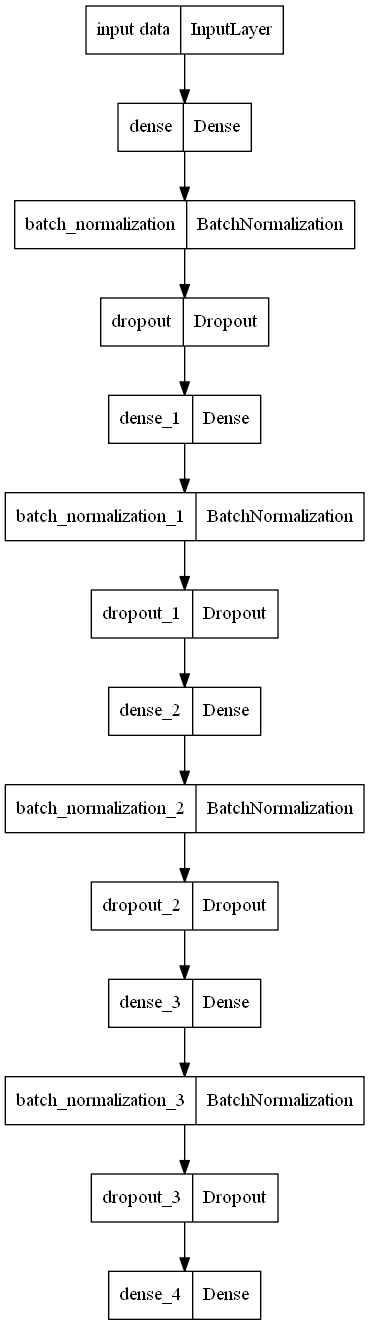

In [6]:
plot_model(train_model)

In [7]:
checkpoint_filepath = 'model/'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                monitor='val_loss', verbose=1, 
                save_best_only=True, save_weights_only = True, mode='min')
train_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])

In [8]:
history = train_model.fit(xtrain, ytrain, epochs = 60, validation_data = (xtest, ytest), batch_size = 64, callbacks = checkpoint)

Epoch 1/60
13/13 [==============================] - ETA: 0s - loss: 1.1469 - accuracy: 0.6386
Epoch 00001: val_loss improved from inf to 2.03081, saving model to model\
13/13 [==============================] - 4s 178ms/step - loss: 1.1469 - accuracy: 0.6386 - val_loss: 2.0308 - val_accuracy: 0.3801
Epoch 2/60
13/13 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9285
Epoch 00002: val_loss improved from 2.03081 to 2.02307, saving model to model\
13/13 [==============================] - 3s 207ms/step - loss: 0.2474 - accuracy: 0.9285 - val_loss: 2.0231 - val_accuracy: 0.1170
Epoch 3/60
13/13 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 0.9849
Epoch 00003: val_loss did not improve from 2.02307
13/13 [==============================] - 0s 19ms/step - loss: 0.1132 - accuracy: 0.9849 - val_loss: 2.0241 - val_accuracy: 0.1053
Epoch 4/60
 9/13 [===================>..........] - ETA: 0s - loss: 0.0846 - accuracy: 0.9861
Epoch 00004: val_loss did n

In [9]:
check_model = model()
check_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])
check_model.load_weights(checkpoint_filepath)


In [10]:
check_model.evaluate(xtest, ytest)

11/11 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000


[0.003266588319092989, 1.0]

In [11]:
y_pred = check_model.predict(xtest)
y_preds_ready = y_pred.argmax(axis=1)

In [12]:
#calculating recal:

print(recall_score(ytest, y_preds_ready, average='macro'))

1.0


In [13]:
out = pd.DataFrame(history.history)
out.head()

,loss,accuracy,val_loss,val_accuracy
0,1.146901,0.638645,2.030808,0.380117
1,0.247432,0.928482,2.023067,0.116959
2,0.113160,0.984944,2.024119,0.105263
3,0.088670,0.983689,2.025975,0.122807
4,0.053586,0.993726,2.024129,0.187135


<AxesSubplot:>

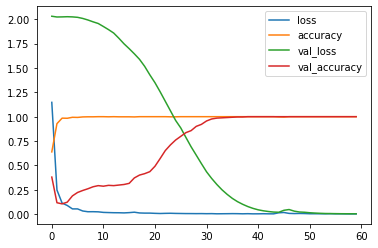

In [14]:
out.plot()

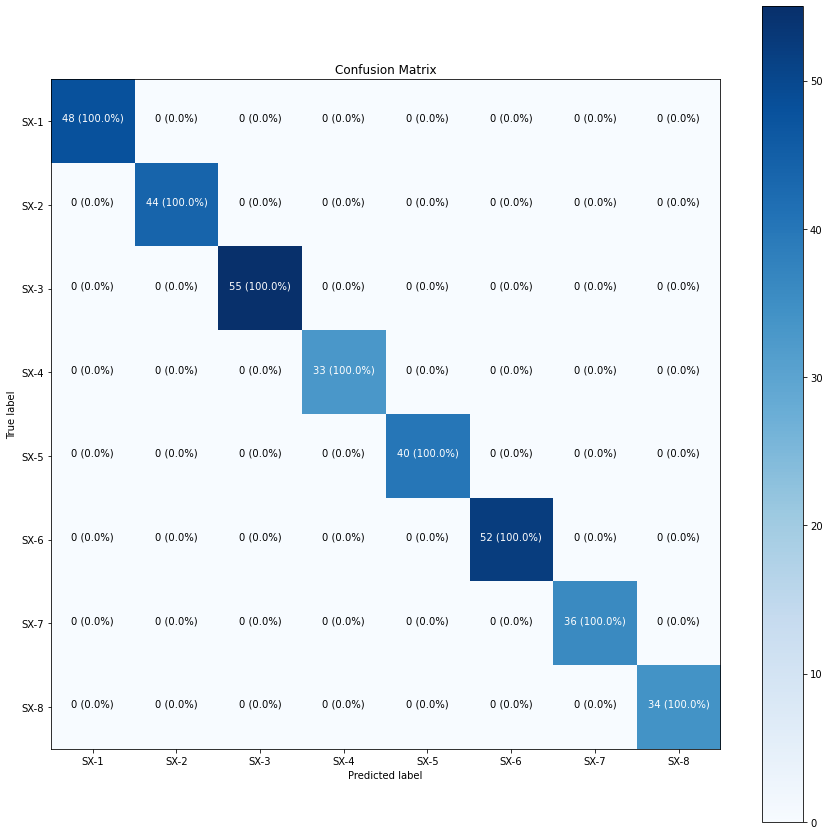

In [15]:
make_confusion_matrix(y_true=ytest, 
                      y_pred=y_preds_ready,
                      classes=['SX-1', 'SX-2', 'SX-3', 'SX-4','SX-5', 'SX-6', 'SX-7', 'SX-8'],
                      figsize=(15, 15),
                      text_size=10)